In [0]:
import numpy as np
import pandas as pd
from datetime import datetime
from dateutil import parser
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
# for colab:

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
recovered = pd.read_csv("drive/My Drive/Colab Notebooks/DS for business/time_series_covid19_recovered_global.csv")
deaths = pd.read_csv("drive/My Drive/Colab Notebooks/DS for business/time_series_covid19_deaths_global.csv")
confirmed = pd.read_csv("drive/My Drive/Colab Notebooks/DS for business/time_series_covid19_confirmed_global.csv")
recovered

Province/State         Country/Region  ...  4/17/20  4/18/20
0                          NaN            Afghanistan  ...       99      112
1                          NaN                Albania  ...      283      302
2                          NaN                Algeria  ...      846      894
3                          NaN                Andorra  ...      191      205
4                          NaN                 Angola  ...        5        6
..                         ...                    ...  ...      ...      ...
245  Saint Pierre and Miquelon                 France  ...        0        0
246                        NaN            South Sudan  ...        0        0
247                        NaN         Western Sahara  ...        0        0
248                        NaN  Sao Tome and Principe  ...        0        0
249                        NaN                  Yemen  ...        0        0

[250 rows x 92 columns]

In [0]:
def reshape_table(deaths):
    deaths_new = deaths.copy()
    deaths_new = deaths_new.fillna("")
    deaths_new.index = deaths_new['Country/Region'] # + deaths_new['Province/State']
    deaths_new = deaths_new.drop(['Lat', 'Long', 'Country/Region', 'Province/State'], 
                                axis='columns')
    deaths_new = deaths_new.transpose()
    deaths_new.index = pd.Series(deaths_new.index).apply(datetime.strptime, args=[r'%m/%d/%y'])
    deaths_new = deaths_new.groupby(by=deaths_new.columns, axis=1).sum()
    return deaths_new

In [0]:
recovered = reshape_table(recovered)
recovered

Country/Region  Afghanistan  Albania  Algeria  ...  Yemen  Zambia  Zimbabwe
2020-01-22                0        0        0  ...      0       0         0
2020-01-23                0        0        0  ...      0       0         0
2020-01-24                0        0        0  ...      0       0         0
2020-01-25                0        0        0  ...      0       0         0
2020-01-26                0        0        0  ...      0       0         0
...                     ...      ...      ...  ...    ...     ...       ...
2020-04-14               40      248      691  ...      0      30         0
2020-04-15               43      251      708  ...      0      30         1
2020-04-16               54      277      783  ...      0      30         1
2020-04-17               99      283      846  ...      0      30         2
2020-04-18              112      302      894  ...      0      33         2

[88 rows x 185 columns]

In [0]:
deaths = reshape_table(deaths)
deaths

Country/Region  Afghanistan  Albania  Algeria  ...  Yemen  Zambia  Zimbabwe
2020-01-22                0        0        0  ...      0       0         0
2020-01-23                0        0        0  ...      0       0         0
2020-01-24                0        0        0  ...      0       0         0
2020-01-25                0        0        0  ...      0       0         0
2020-01-26                0        0        0  ...      0       0         0
...                     ...      ...      ...  ...    ...     ...       ...
2020-04-14               23       24      326  ...      0       2         3
2020-04-15               25       25      336  ...      0       2         3
2020-04-16               30       26      348  ...      0       2         3
2020-04-17               30       26      364  ...      0       2         3
2020-04-18               30       26      367  ...      0       2         3

[88 rows x 185 columns]

In [0]:
confirmed = reshape_table(confirmed)
confirmed

Country/Region  Afghanistan  Albania  Algeria  ...  Yemen  Zambia  Zimbabwe
2020-01-22                0        0        0  ...      0       0         0
2020-01-23                0        0        0  ...      0       0         0
2020-01-24                0        0        0  ...      0       0         0
2020-01-25                0        0        0  ...      0       0         0
2020-01-26                0        0        0  ...      0       0         0
...                     ...      ...      ...  ...    ...     ...       ...
2020-04-14              714      475     2070  ...      1      45        17
2020-04-15              784      494     2160  ...      1      48        23
2020-04-16              840      518     2268  ...      1      48        23
2020-04-17              906      539     2418  ...      1      52        24
2020-04-18              933      548     2534  ...      1      57        25

[88 rows x 185 columns]

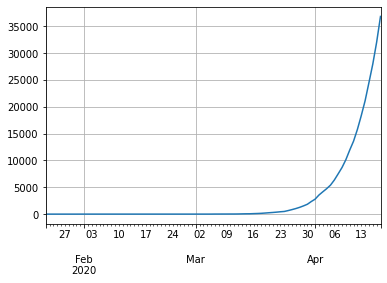

In [0]:
confirmed['Russia'].plot()
plt.grid()

In [0]:
confirmed_signif = dict()
for country in confirmed.columns:
    if len(confirmed[confirmed[country] > 50][country]) > 0:
        confirmed_signif[country] = confirmed[confirmed[country] >= 50][country]
print(len(confirmed_signif))
confirmed_signif['Russia']

142


2020-03-14       59
2020-03-15       63
2020-03-16       90
2020-03-17      114
2020-03-18      147
2020-03-19      199
2020-03-20      253
2020-03-21      306
2020-03-22      367
2020-03-23      438
2020-03-24      495
2020-03-25      658
2020-03-26      840
2020-03-27     1036
2020-03-28     1264
2020-03-29     1534
2020-03-30     1836
2020-03-31     2337
2020-04-01     2777
2020-04-02     3548
2020-04-03     4149
2020-04-04     4731
2020-04-05     5389
2020-04-06     6343
2020-04-07     7497
2020-04-08     8672
2020-04-09    10131
2020-04-10    11917
2020-04-11    13584
2020-04-12    15770
2020-04-13    18328
2020-04-14    21102
2020-04-15    24490
2020-04-16    27938
2020-04-17    32008
2020-04-18    36793
Name: Russia, dtype: int64

In [0]:
deaths_signif = dict()
for country in deaths.columns:
    if len(deaths[deaths[country] > 50][country]) > 0:
        deaths_signif[country] = deaths[deaths[country] > 50][country]
len(deaths_signif)

56

In [0]:
confirmed['Russia']

2020-01-22        0
2020-01-23        0
2020-01-24        0
2020-01-25        0
2020-01-26        0
              ...  
2020-04-14    21102
2020-04-15    24490
2020-04-16    27938
2020-04-17    32008
2020-04-18    36793
Name: Russia, Length: 88, dtype: int64

In [0]:
tenth_day = [stat[9] for stat in confirmed_signif.values() if len(stat) >= 10]
tenth_day = np.array(tenth_day)
print(tenth_day.mean(), np.median(tenth_day), tenth_day.max(), tenth_day.min())

526.7404580152672 261.0 9802 55


862.2108108108108 9.0 38664 0


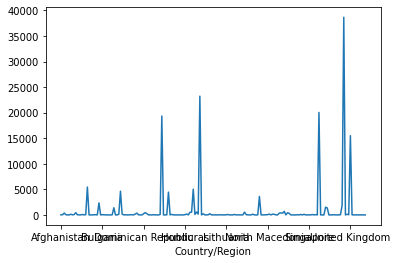

In [0]:
last_day = deaths.iloc[-1]
print(last_day.mean(), np.median(last_day), last_day.max(), last_day[last_day>=0].min())
last_day.plot()
# tenth_day = np.array(tenth_day)
# print(tenth_day.mean(), np.median(tenth_day), tenth_day.max(), tenth_day.min())

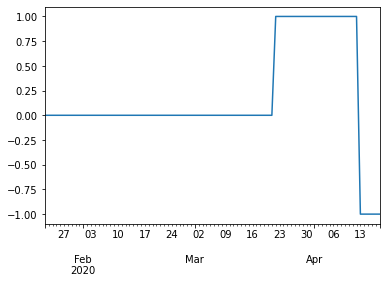

In [0]:
deaths.iloc[:,231].plot()

In [0]:
confirmed

Afghanistan  Albania  ...  Sao Tome and Principe  Yemen
2020-01-22            0        0  ...                      0      0
2020-01-23            0        0  ...                      0      0
2020-01-24            0        0  ...                      0      0
2020-01-25            0        0  ...                      0      0
2020-01-26            0        0  ...                      0      0
...                 ...      ...  ...                    ...    ...
2020-04-14          714      475  ...                      4      1
2020-04-15          784      494  ...                      4      1
2020-04-16          840      518  ...                      4      1
2020-04-17          906      539  ...                      4      1
2020-04-18          933      548  ...                      4      1

[88 rows x 264 columns]

In [0]:
confirmed_shifted = confirmed.copy()
confirmed_shifted.index = confirmed.index.shift(+1, freq='D')
confirmed_shifted

Country/Region  Afghanistan  Albania  Algeria  ...  Yemen  Zambia  Zimbabwe
2020-01-23                0        0        0  ...      0       0         0
2020-01-24                0        0        0  ...      0       0         0
2020-01-25                0        0        0  ...      0       0         0
2020-01-26                0        0        0  ...      0       0         0
2020-01-27                0        0        0  ...      0       0         0
...                     ...      ...      ...  ...    ...     ...       ...
2020-04-15              714      475     2070  ...      1      45        17
2020-04-16              784      494     2160  ...      1      48        23
2020-04-17              840      518     2268  ...      1      48        23
2020-04-18              906      539     2418  ...      1      52        24
2020-04-19              933      548     2534  ...      1      57        25

[88 rows x 185 columns]

In [0]:
new_cases = confirmed - confirmed_shifted
new_cases = new_cases.drop(pd.to_datetime(['2020-01-22', '2020-04-19']), axis='rows')
new_cases

Country/Region  Afghanistan  Albania  Algeria  ...  Yemen  Zambia  Zimbabwe
2020-01-23              0.0      0.0      0.0  ...    0.0     0.0       0.0
2020-01-24              0.0      0.0      0.0  ...    0.0     0.0       0.0
2020-01-25              0.0      0.0      0.0  ...    0.0     0.0       0.0
2020-01-26              0.0      0.0      0.0  ...    0.0     0.0       0.0
2020-01-27              0.0      0.0      0.0  ...    0.0     0.0       0.0
...                     ...      ...      ...  ...    ...     ...       ...
2020-04-14             49.0      8.0     87.0  ...    0.0     0.0       0.0
2020-04-15             70.0     19.0     90.0  ...    0.0     3.0       6.0
2020-04-16             56.0     24.0    108.0  ...    0.0     0.0       0.0
2020-04-17             66.0     21.0    150.0  ...    0.0     4.0       1.0
2020-04-18             27.0      9.0    116.0  ...    0.0     5.0       1.0

[87 rows x 185 columns]

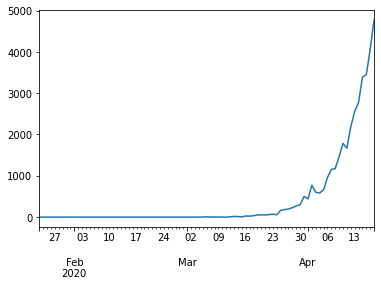

In [0]:
new_cases['Russia'].plot()

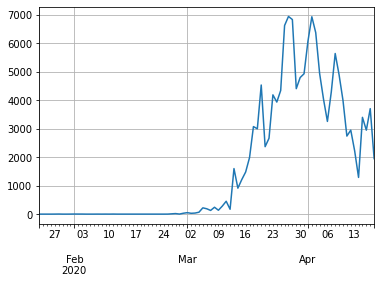

In [0]:
new_cases['Germany'].plot()
plt.grid()

In [0]:
print(new_cases['Germany'][-10:].mean())
new_cases['Germany'][-10:]

3004.6


2020-04-09    4885.0
2020-04-10    3990.0
2020-04-11    2737.0
2020-04-12    2946.0
2020-04-13    2218.0
2020-04-14    1287.0
2020-04-15    3394.0
2020-04-16    2945.0
2020-04-17    3699.0
2020-04-18    1945.0
Name: Germany, dtype: float64

In [0]:
fatality_rate = deaths/(confirmed+0.00001)
# fatality_rate = fatality_rate.loc[]
countries_10000_confirmed = []
for country in confirmed.columns:
    if confirmed.loc[pd.to_datetime('2020-04-18'),country] > 10000:
        countries_10000_confirmed.append(country)
countries_10000_confirmed
fatality_rate_10000 = fatality_rate[countries_10000_confirmed]
fatality_rate_10000

Country/Region   Austria   Belgium  ...        US  United Kingdom
2020-01-22      0.000000  0.000000  ...  0.000000        0.000000
2020-01-23      0.000000  0.000000  ...  0.000000        0.000000
2020-01-24      0.000000  0.000000  ...  0.000000        0.000000
2020-01-25      0.000000  0.000000  ...  0.000000        0.000000
2020-01-26      0.000000  0.000000  ...  0.000000        0.000000
...                  ...       ...  ...       ...             ...
2020-04-14      0.026993  0.133584  ...  0.042508        0.127882
2020-04-15      0.027414  0.132249  ...  0.044512        0.129610
2020-04-16      0.028323  0.139533  ...  0.049306        0.132114
2020-04-17      0.029531  0.142869  ...  0.052555        0.133070
2020-04-18      0.030196  0.146653  ...  0.052805        0.134398

[88 rows x 24 columns]

In [0]:
print(round(fatality_rate_10000.iloc[-1].max(), 4),
      round(fatality_rate_10000.iloc[-1].min(), 4))
fatality_rate_10000.iloc[-1]

0.1467 0.0085


Country/Region
Austria           0.030196
Belgium           0.146653
Brazil            0.064215
Canada            0.040722
China             0.055331
France            0.129703
Germany           0.031107
India             0.033138
Iran              0.062212
Ireland           0.038691
Israel            0.012363
Italy             0.132028
Japan             0.021562
Korea, South      0.021778
Netherlands       0.113738
Peru              0.024133
Portugal          0.034900
Russia            0.008507
Spain             0.104540
Sweden            0.109318
Switzerland       0.049920
Turkey            0.022957
US                0.052805
United Kingdom    0.134398
Name: 2020-04-18 00:00:00, dtype: float64

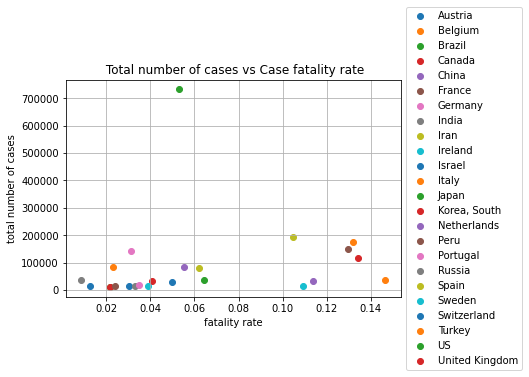

<Figure size 432x288 with 0 Axes>

In [0]:
for country in countries_10000_confirmed:
    plt.scatter(fatality_rate_10000.iloc[-1][country], 
                confirmed.loc[pd.to_datetime('2020-04-18'),country],
                label=country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('fatality rate')
plt.ylabel('total number of cases')
plt.title(' Total number of cases vs Case fatality rate')
# plt.tight_layout()
plt.grid()
plt.figure()
plt.show()


In [0]:
confirmed[countries_10000_confirmed].iloc[-1]

Country/Region
Austria            14671
Belgium            37183
Brazil             36658
Canada             34355
China              83787
France            149149
Germany           143342
India              15722
Iran               80868
Ireland            14758
Israel             13265
Italy             175925
Japan              10296
Korea, South       10653
Netherlands        31766
Peru               14420
Portugal           19685
Russia             36793
Spain             191726
Sweden             13822
Switzerland        27404
Turkey             82329
US                732197
United Kingdom    115314
Name: 2020-04-18 00:00:00, dtype: int64

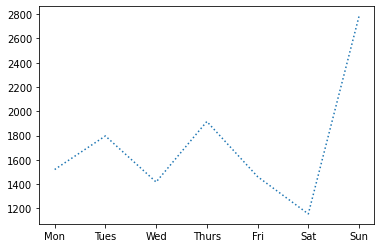

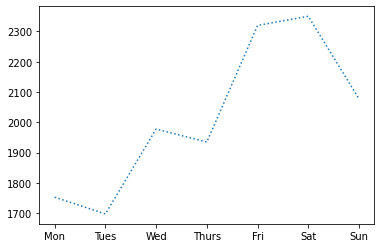

In [0]:
for data in [new_cases['France'], new_cases['Italy']]:
    by_weekday = data.groupby(data.index.dayofweek).mean()
    by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
    by_weekday.plot(style=[':', '--', '-']);
    plt.show()